In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading the data
dat = pd.read_csv("2019-06-13-exam-pa-data-file.csv")

# Variables to relevel
vars = dat.columns[4:14]  # Adjusted indexing for Python

for var in vars:
    # Compute frequency table for the variable
    table = dat[var].value_counts().reset_index()
    table.columns = ['Level', 'Count']
    
    # Find the level with the maximum count
    max_level = table.loc[table['Count'].idxmax(), 'Level']
    
    # Reorder levels, moving the most frequent level to the front
    # Since pandas does not have a direct equivalent of factor releveling as in R,
    # we simulate it by sorting based on whether the value is the max_level or not
    dat[var] = pd.Categorical(dat[var], categories=[max_level] + [x for x in dat[var].unique() if x != max_level], ordered=True)


In [48]:
dat

,Crash_Score,year,Month,Time_of_Day,Rd_Feature,Rd_Character,Rd_Class,Rd_Configuration,Rd_Surface,Rd_Conditions,Light,Weather,Traffic_Control,Work_Area
0,6.56,2016,6,2,NONE,STRAIGHT-LEVEL,STATE HWY,TWO-WAY-PROTECTED-MEDIAN,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NONE,NO
1,6.53,2016,6,3,NONE,STRAIGHT-LEVEL,OTHER,TWO-WAY-NO-MEDIAN,COARSE ASPHALT,DRY,DAYLIGHT,CLEAR,NONE,NO
2,1.58,2016,6,5,NONE,STRAIGHT-LEVEL,STATE HWY,TWO-WAY-NO-MEDIAN,SMOOTH ASPHALT,DRY,DARK-NOT-LIT,CLEAR,NONE,NO
3,7.15,2016,6,3,NONE,STRAIGHT-LEVEL,OTHER,TWO-WAY-NO-MEDIAN,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,NONE,NO
4,9.57,2016,6,6,NONE,STRAIGHT-LEVEL,OTHER,TWO-WAY-NO-MEDIAN,COARSE ASPHALT,DRY,DARK-LIT,CLEAR,NONE,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23132,1.80,2018,12,5,NONE,STRAIGHT-LEVEL,STATE HWY,TWO-WAY-UNPROTECTED-MEDIAN,SMOOTH ASPHALT,DRY,DARK-LIT,CLEAR,NONE,NO
23133,2.59,2018,12,6,INTERSECTION,STRAIGHT-LEVEL,STATE HWY,TWO-WAY-UNPROTECTED-MEDIAN,SMOOTH ASPHALT,DRY,DUSK,CLEAR,SIGNAL,NO
23134,6.95,2018,12,3,INTERSECTION,STRAIGHT-OTHER,OTHER,TWO-WAY-UNPROTECTED-MEDIAN,SMOOTH ASPHALT,DRY,DAYLIGHT,CLEAR,SIGNAL,NO
23135,3.17,2018,12,5,NONE,STRAIGHT-OTHER,US HWY,TWO-WAY-PROTECTED-MEDIAN,COARSE ASPHALT,DRY,DARK-NOT-LIT,CLEAR,NONE,NO


# Explore the relationship of each variable to Crash_Score

For the target variable Crash Score the median is 5.66, the mean is 6.57, and the maximum is 53.07. This 
indicates that the distribution is skewed to the right. A histogram confirms this:

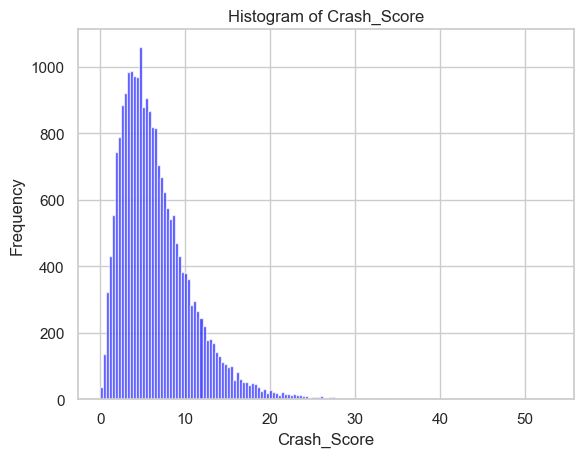

In [49]:
import matplotlib.pyplot as plt

# Plotting histogram of Crash_Score
plt.hist(dat['Crash_Score'], bins='auto', color='blue', alpha=0.7)
plt.xlabel('Crash_Score')
plt.ylabel('Frequency')
plt.title('Histogram of Crash_Score')
plt.show()


Because the distribution of the target is skewed to the right, I have elected to plot the log of the target variable.

Code has been modified to provide the calculations using the log of the target variable.

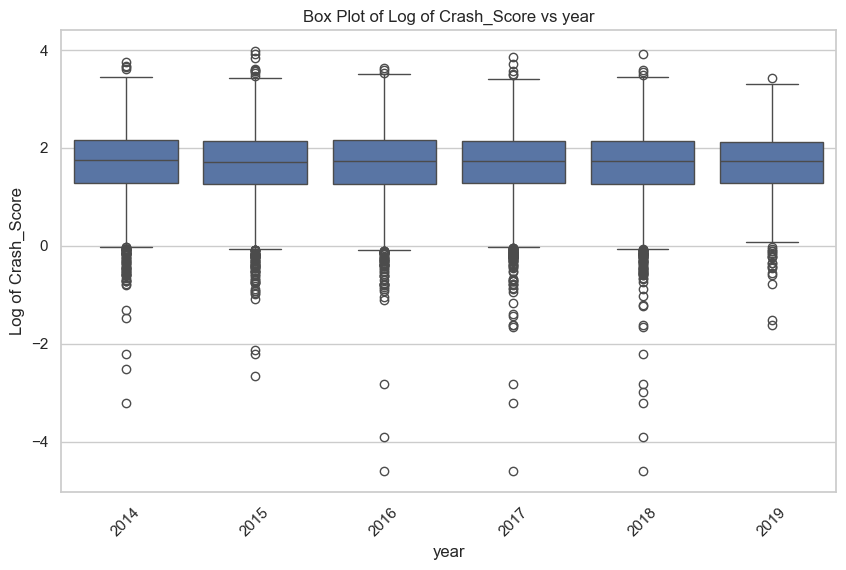

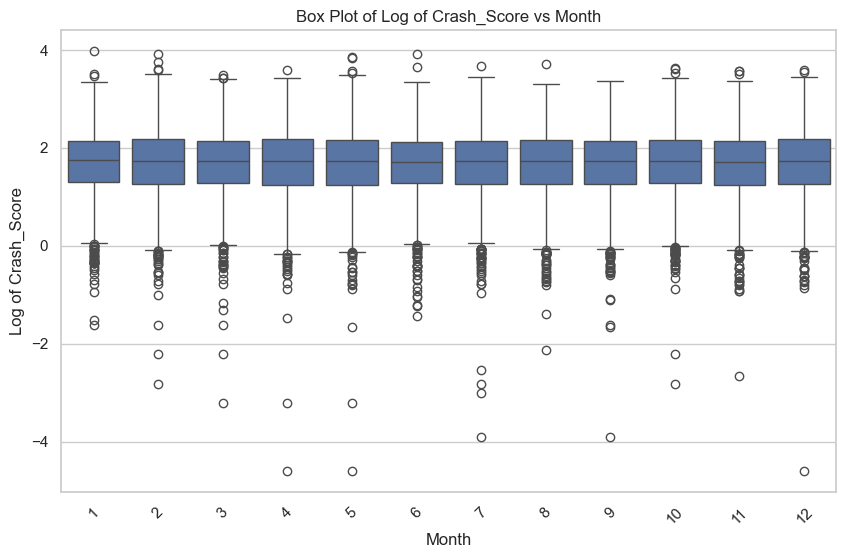

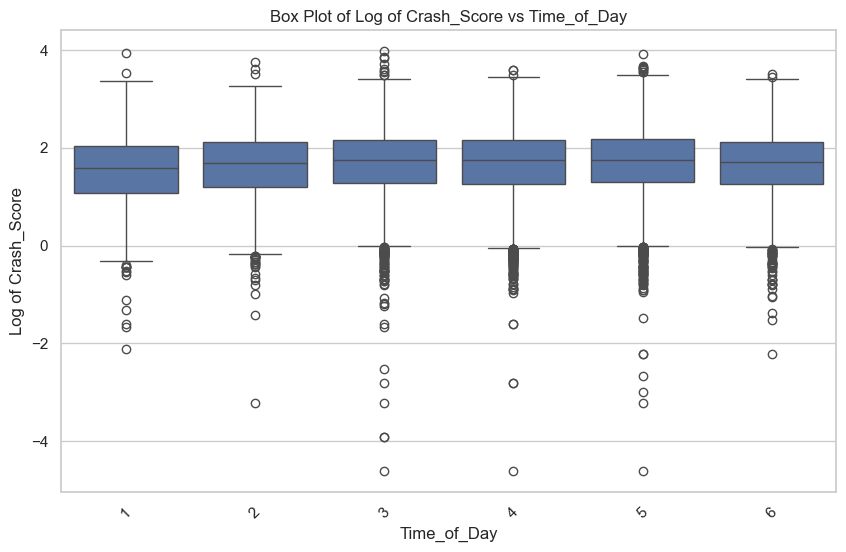

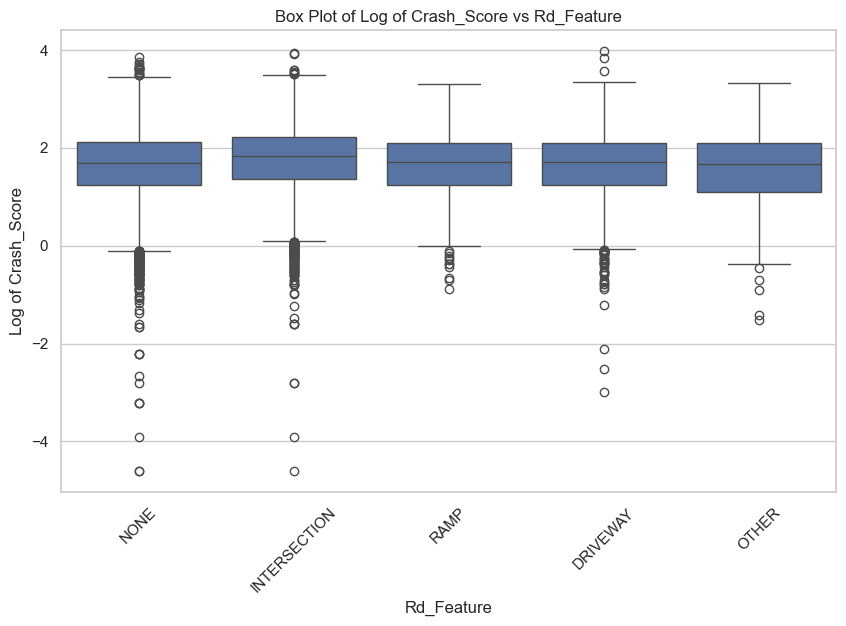

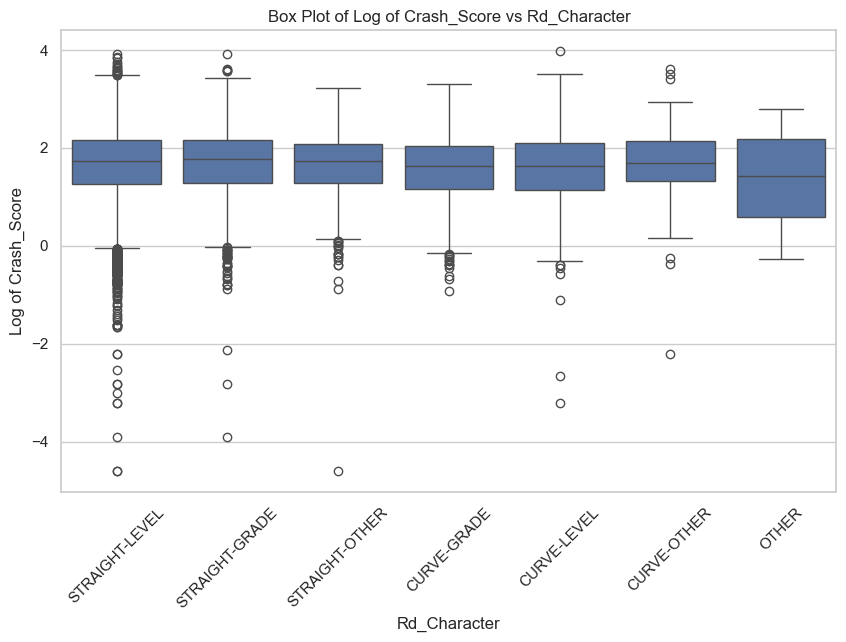

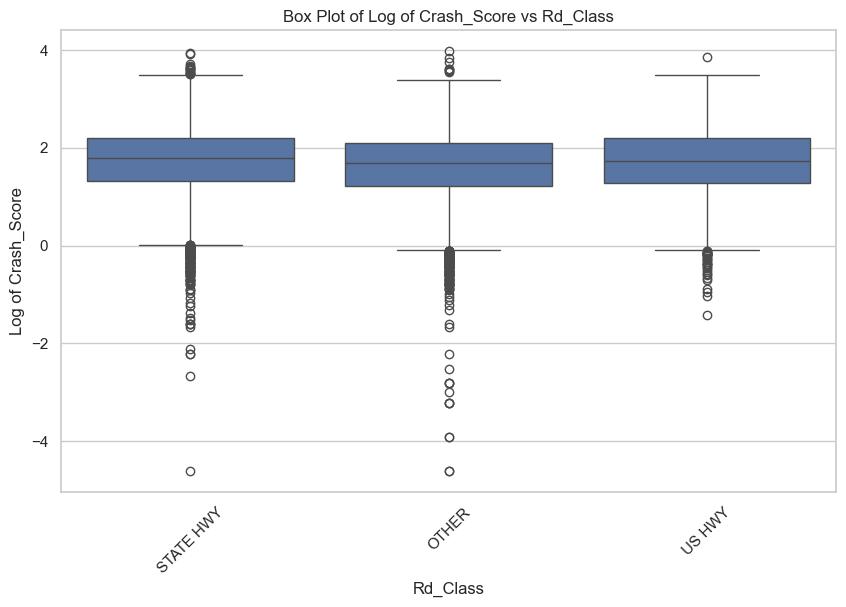

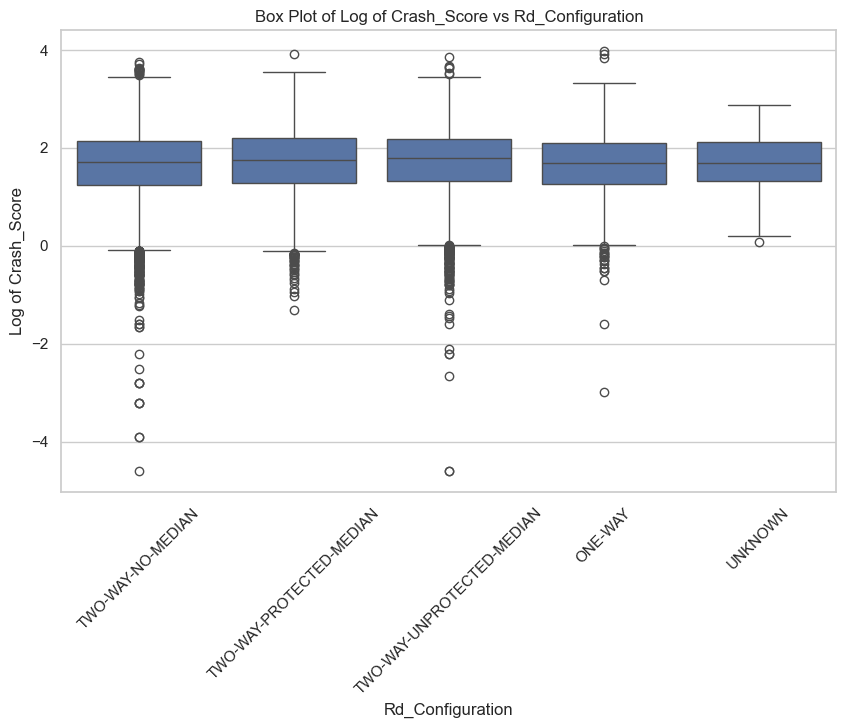

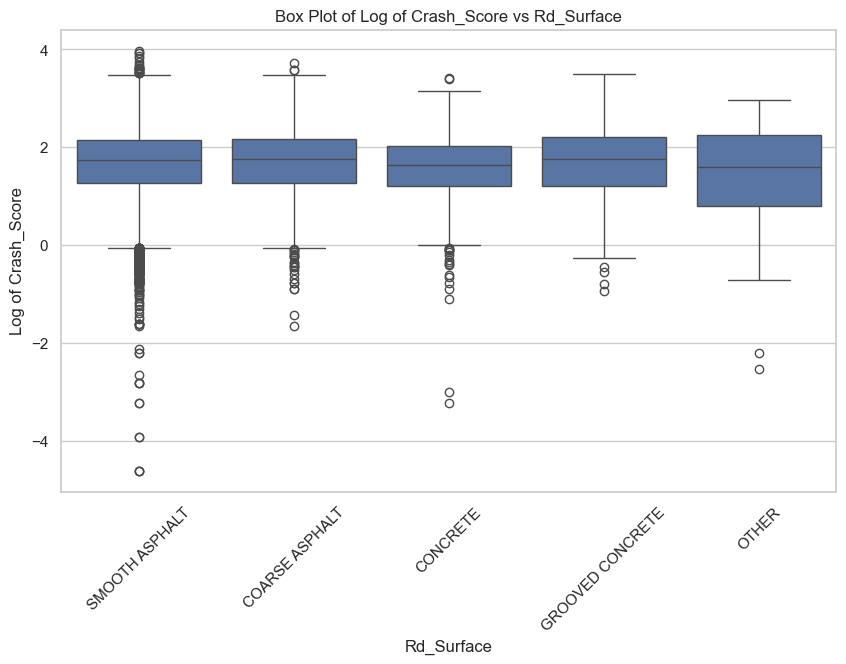

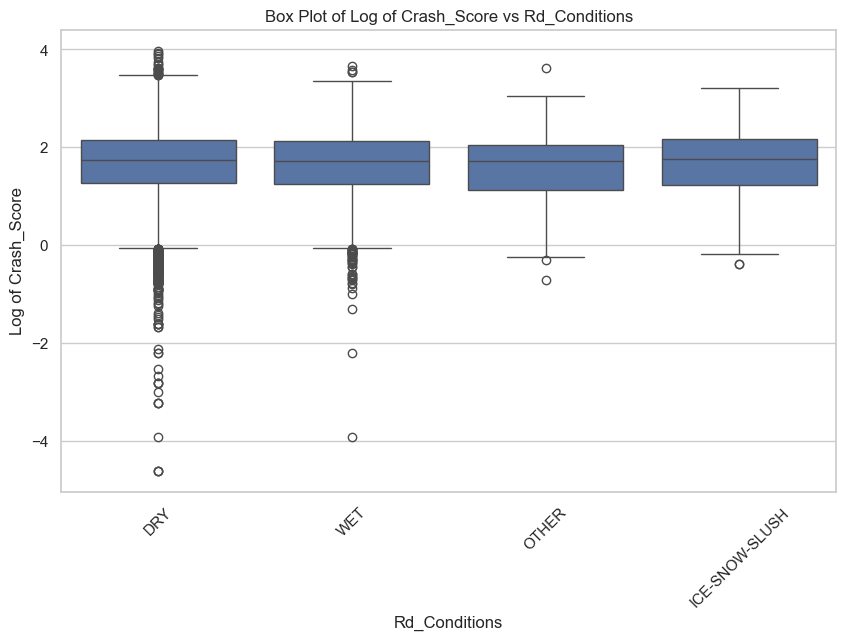

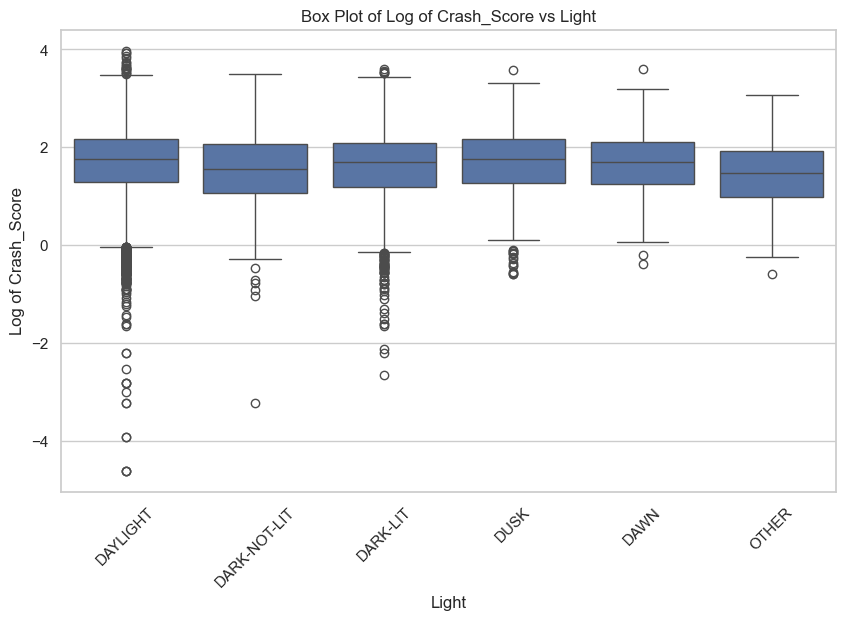

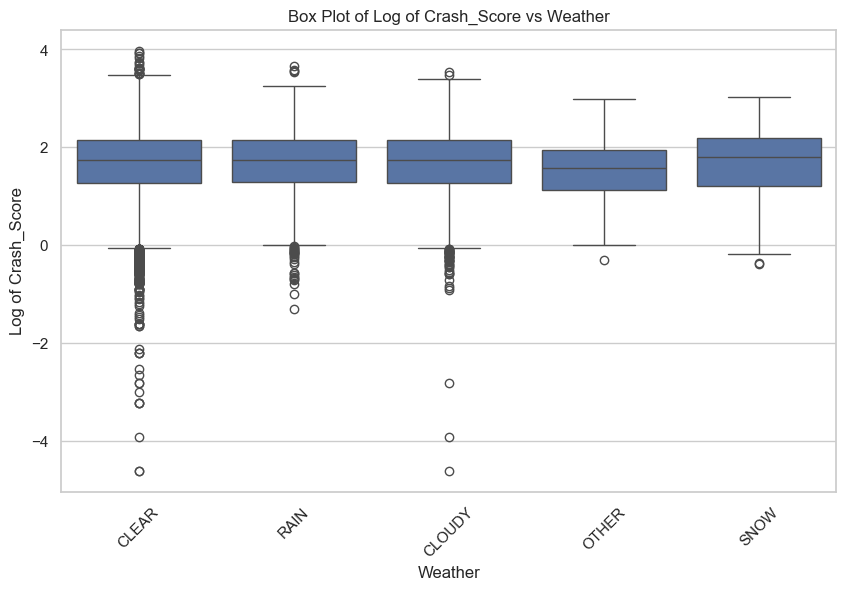

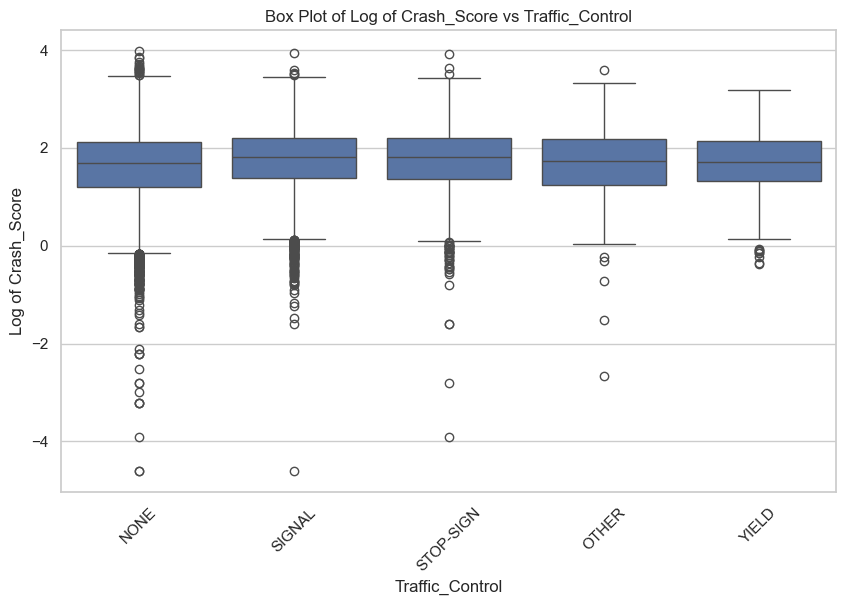

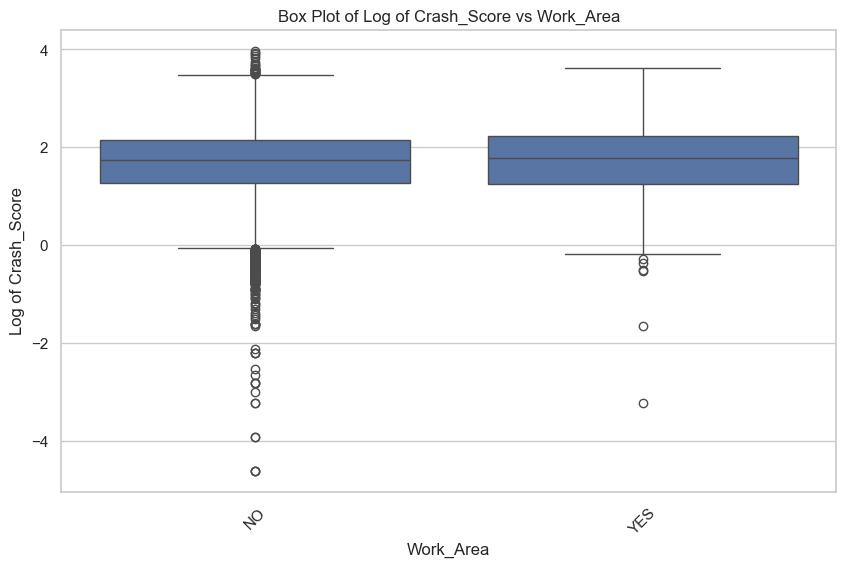

In [50]:
import seaborn as sns


vars = [col for col in dat.columns if col != "Crash_Score"]  # Exclude "Crash_Score"

for var in vars:
    # Convert the column to a categorical type if it's not already
    dat[var] = dat[var].astype('category')
    
    # Create a boxplot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.boxplot(x=var, y=np.log(dat['Crash_Score']), data=dat)
    plt.xlabel(var)
    plt.ylabel('Log of Crash_Score')
    plt.title(f'Box Plot of Log of Crash_Score vs {var}')
    plt.xticks(rotation=45)  # Rotate labels to avoid overlap
    plt.show()


In [51]:

for var in vars:
    print(var)
    grouped = dat.groupby(var).agg(
        mean_log_Crash_Score=('Crash_Score', lambda x: np.mean(np.log(x))),
        median_log_Crash_Score=('Crash_Score', lambda x: np.median(np.log(x))),
        n=('Crash_Score', 'size')
    ).reset_index()
    print(grouped)


year
   year  mean_log_Crash_Score  median_log_Crash_Score     n
0  2014              1.682270                1.752672  3928
1  2015              1.665230                1.719189  4402
2  2016              1.674663                1.736951  4651
3  2017              1.673778                1.733424  4558
4  2018              1.663890                1.728109  4833
5  2019              1.668689                1.722767   765
Month
   Month  mean_log_Crash_Score  median_log_Crash_Score     n
0      1              1.679902                1.750937  2052
1      2              1.680529                1.733424  1947
2      3              1.677242                1.735189  1887
3      4              1.665018                1.736951  1705
4      5              1.664996                1.742219  2013
5      6              1.668747                1.710188  1864
6      7              1.656251                1.731656  1671
7      8              1.669821                1.740466  1926
8      9            

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2196602575.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dat.groupby(var).agg(
/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2196602575.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dat.groupby(var).agg(
/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2196602575.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and 

It appears there are several variables that may predict the target variable, but none stand out as making  large differences. 

# Reduce the number of factor levels where appropriate

Several of the variables have a small number of observations at some of the factor levels. 
Consider using knowledge of the factor levels as well as evidence from Task 1 to combine some 
of them into factor levels with more observations.

Do not reduce the number of levels for Rd_Conditions, Light, and Weather. These variables are 
addressed in the next Task. To ensure all candidates work with identical variables, they should 
not be changed in this Task

 Bar charts of predictor variables

In [52]:
def draw_bar(col_name):
    plt.figure(figsize=(10, 6))  # 设置图形的大小
    sns.countplot(x='{}'.format(col_name), data=dat2, order = dat2[col_name].value_counts().index)
    plt.title('Frequency of Each Category in {}'.format(col_name))
    plt.show()

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


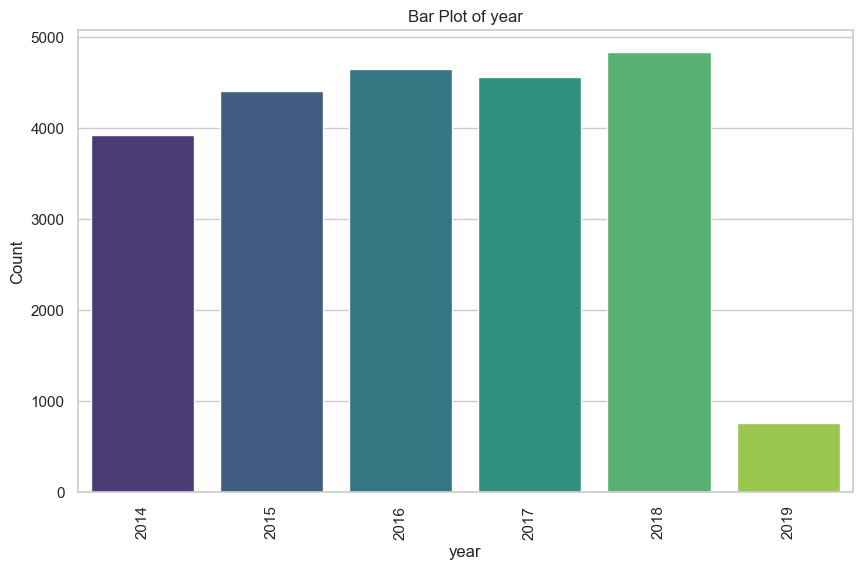

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


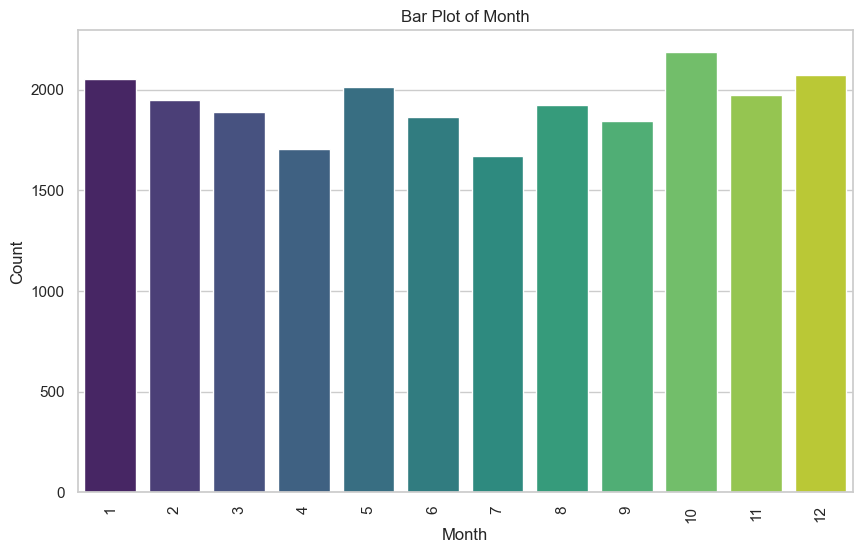

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


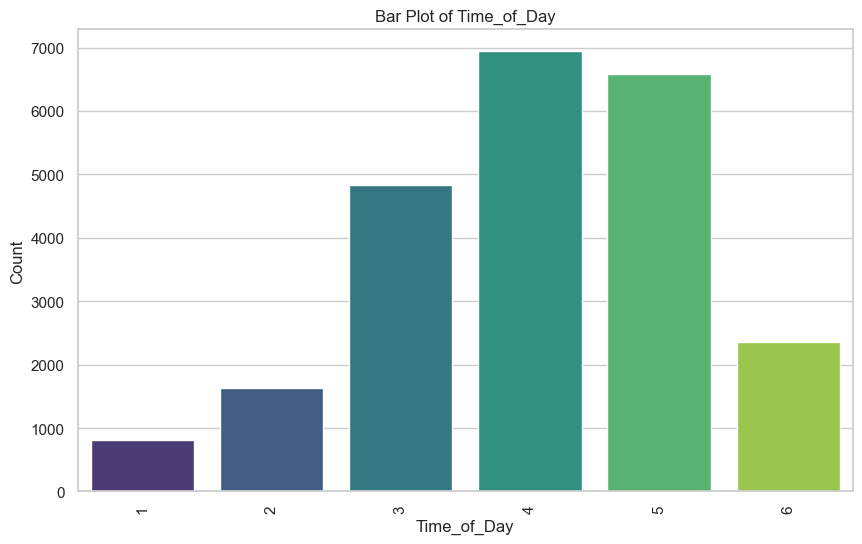

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


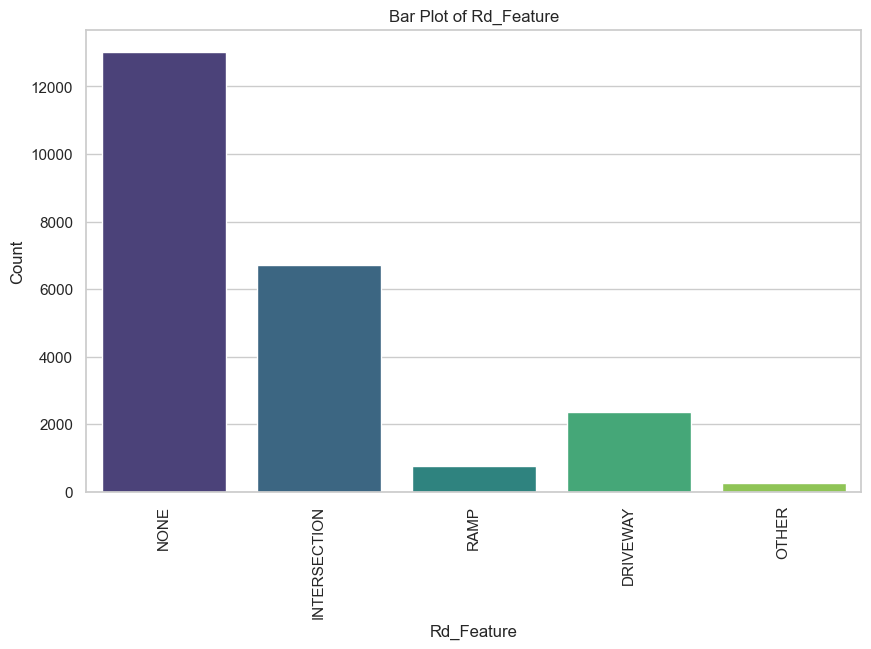

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


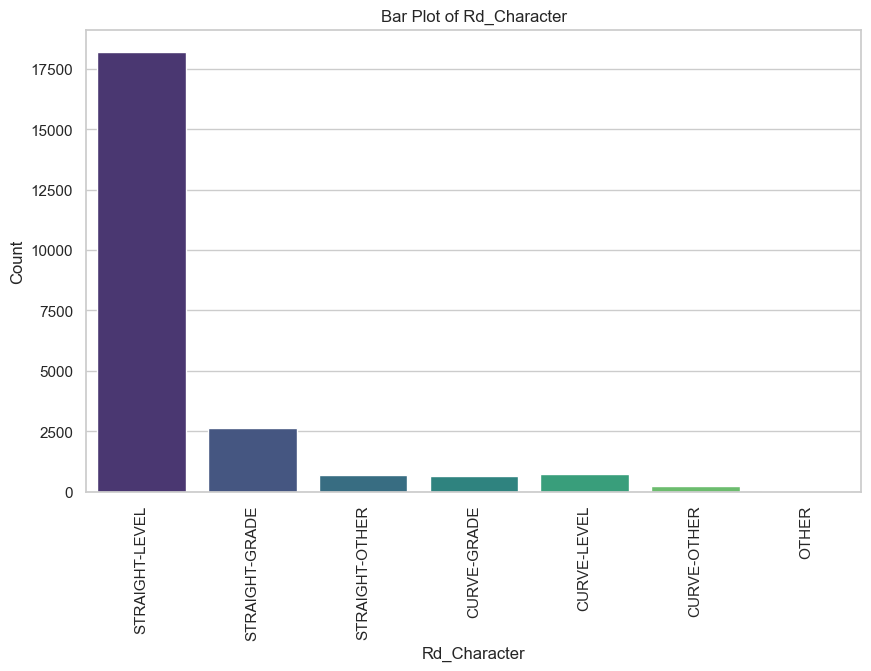

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


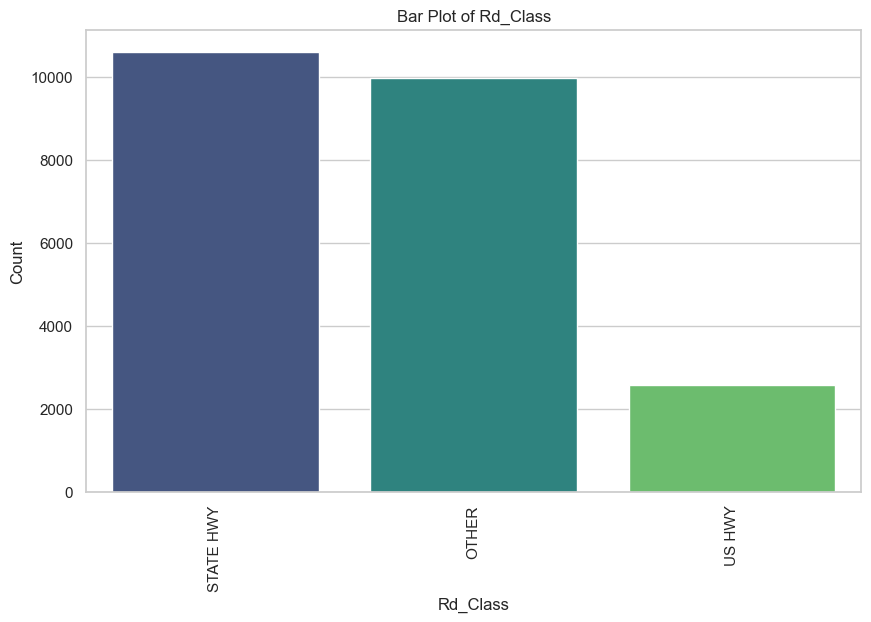

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


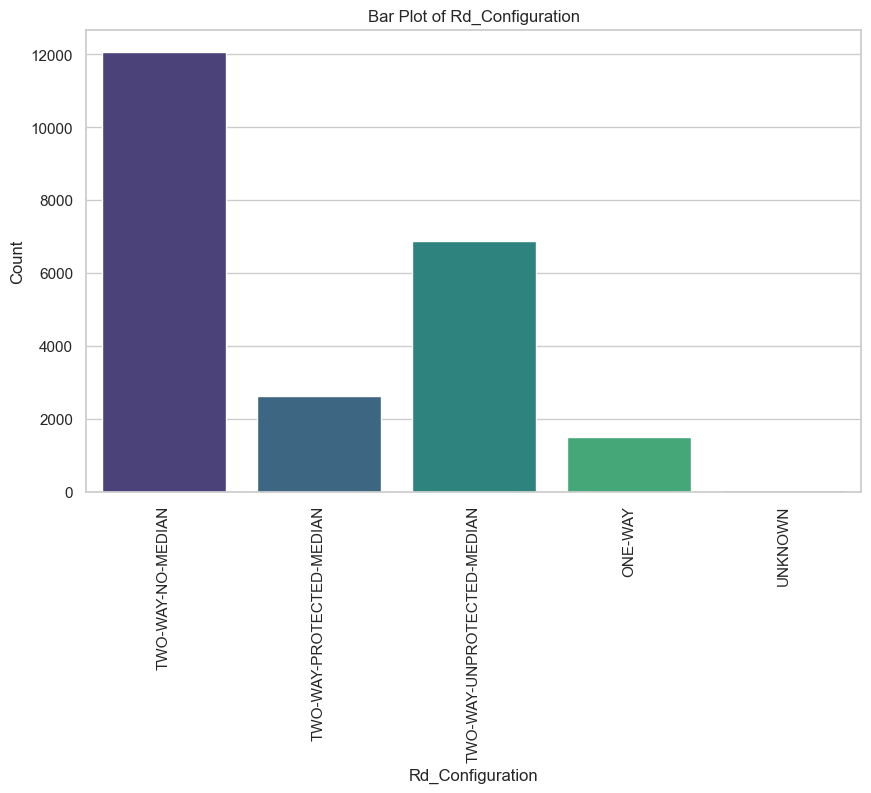

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


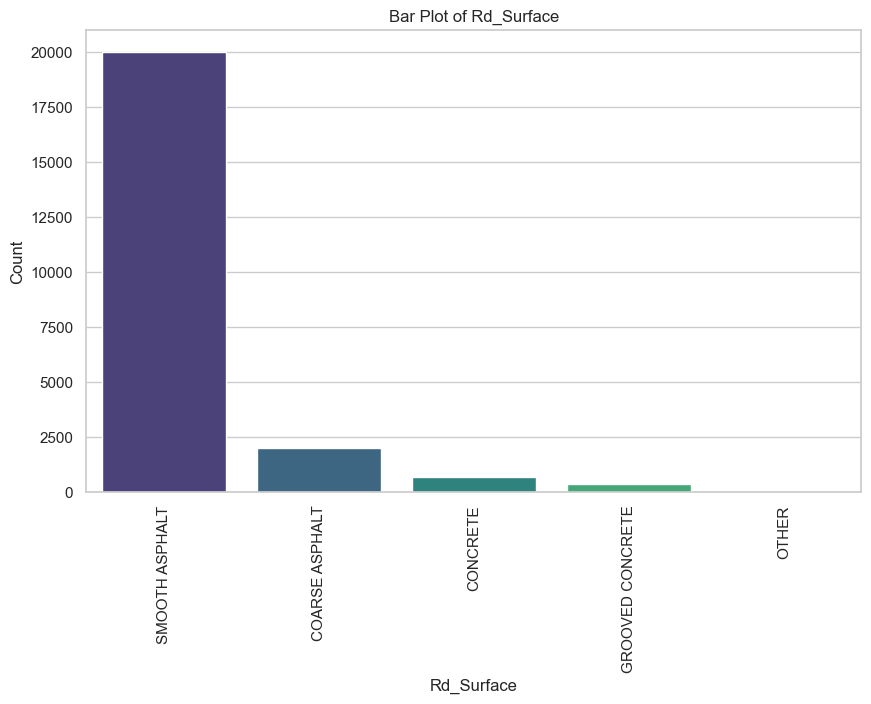

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


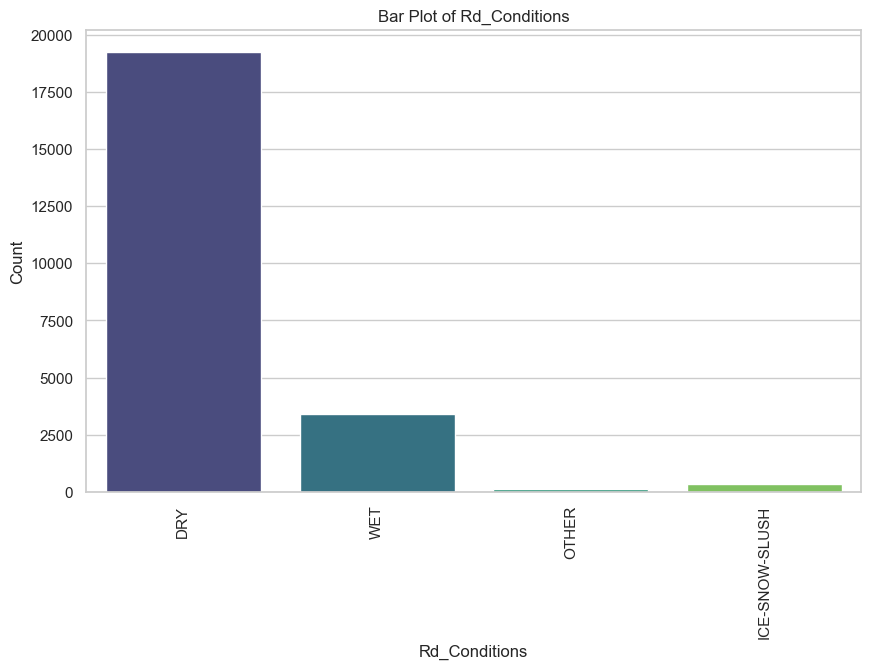

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


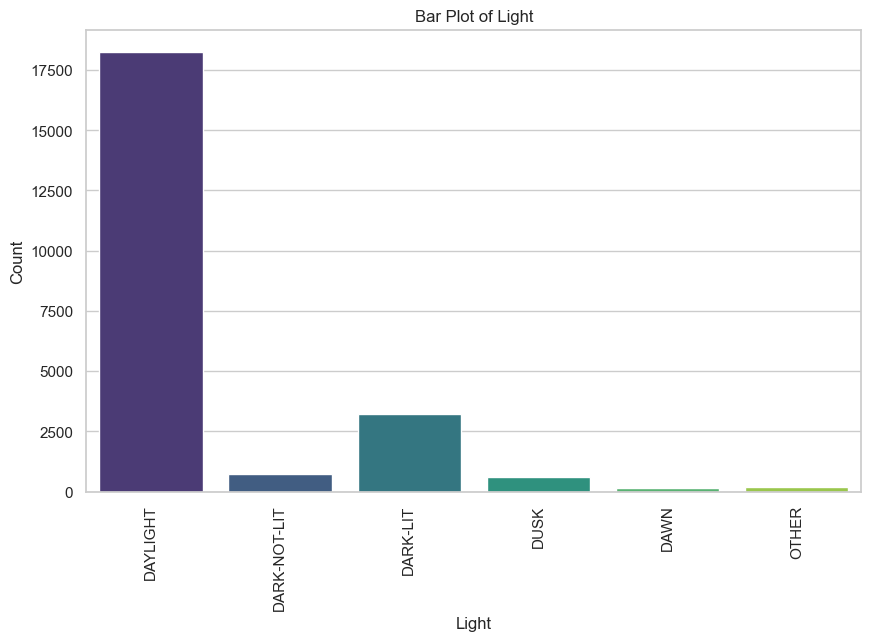

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


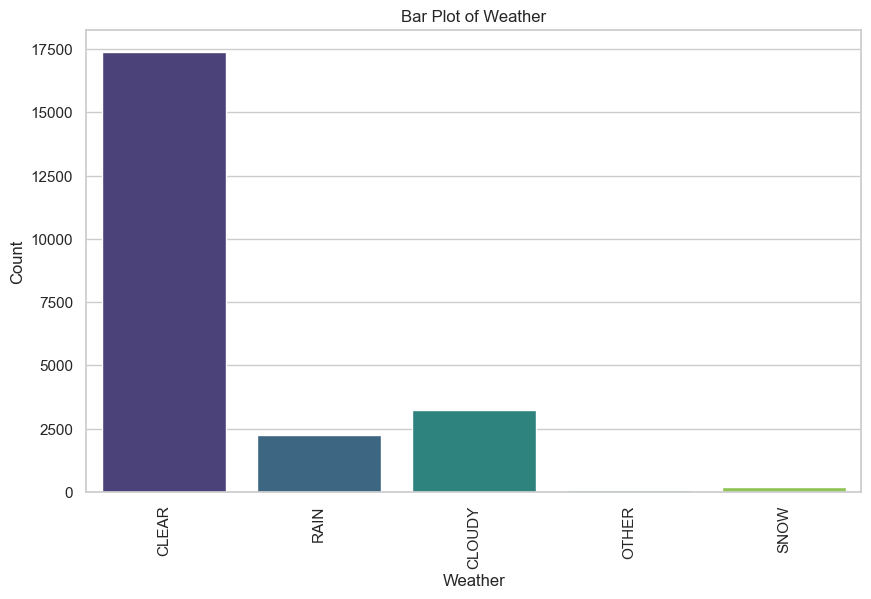

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


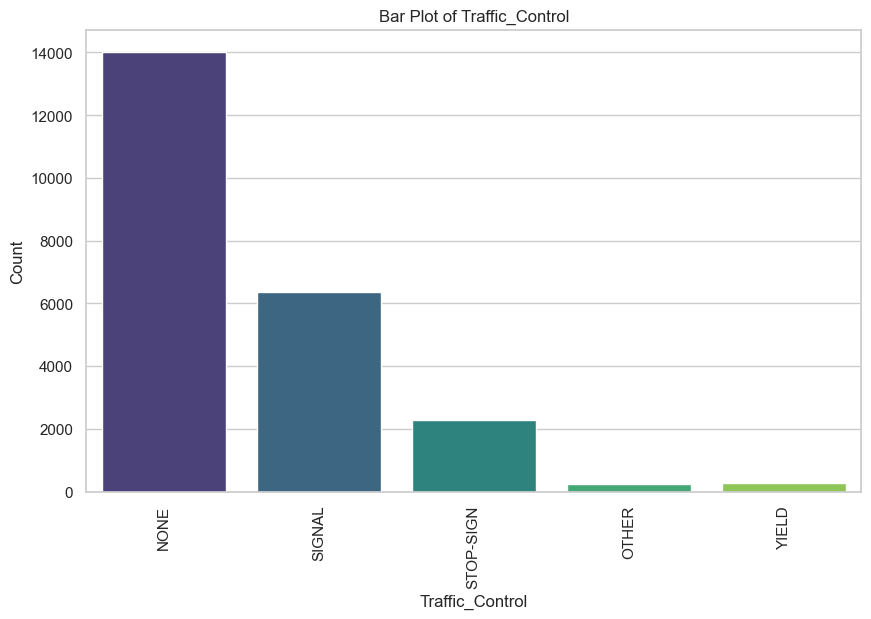

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2960636747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=dat, palette="viridis")


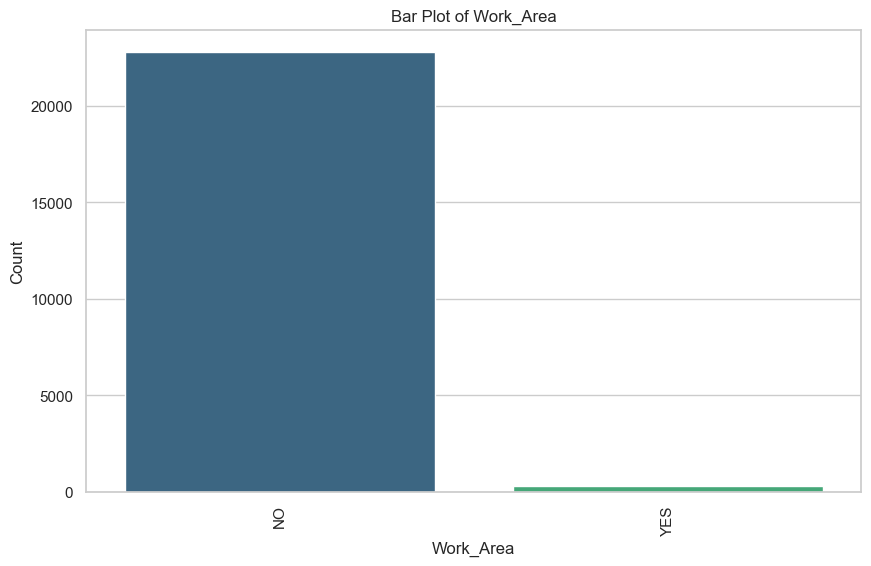

In [53]:
for var in vars:
    # Setting the plot size for better readability
    plt.figure(figsize=(10, 6))
    
    # Count plot for each variable
    sns.countplot(x=var, data=dat, palette="viridis")
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=90)
    
    plt.xlabel(var)  # Setting the x-axis label to the current variable
    plt.ylabel('Count')  # Setting the y-axis label
    plt.title(f'Bar Plot of {var}')  # Setting the title of the plot
    
    # Show plot
    plt.show()

Change 1: Time_of_Day: 1 = OVERNIGHT, 2 and 6 = LATE-EARLY, 3-5 = DAYTIME.First must make this a factor variable.

Time_of_Day: Time 1 = OVERNIGHT, Times 2 and 6 = LATE‐EARLY, Times 3‐5 = DAYTIME. They 
have different means and medians and make sense with regard to accident severity. 

Index([1, 2, 3, 4, 5, 6], dtype='int64')


/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/3292986472.py:23: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dat2['Time_of_Day'] = dat2['Time_of_Day'].replace(replacement_mapping)


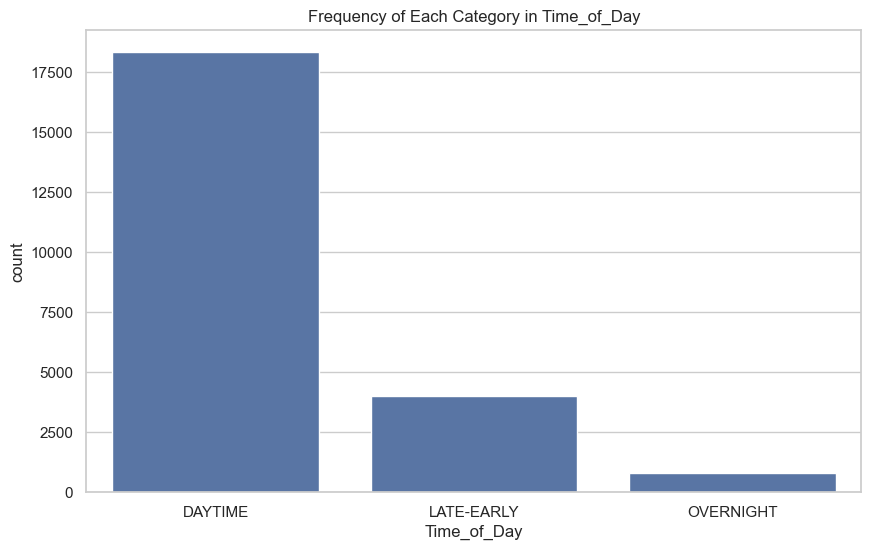

In [54]:
# Convert 'Time_of_Day' to a categorical type
dat['Time_of_Day'] = dat['Time_of_Day'].astype('category')

# Print the original levels (categories)
print(dat['Time_of_Day'].cat.categories)

# Create a copy of the DataFrame for modifications
dat2 = dat.copy()

# Manually adjust the levels for 'Time_of_Day'
replacement_mapping = {
    1: "OVERNIGHT",
    2: "LATE-EARLY",
    # Assuming "Original_Level_3" and "Original_Level_4" map to "DAYTIME",
    # and so on. Replace these keys with the actual original levels from your dataset.
    3: "DAYTIME",
    4: "DAYTIME",
    5: "DAYTIME",
    6: "LATE-EARLY"
}

# Replace the levels based on the mapping
dat2['Time_of_Day'] = dat2['Time_of_Day'].replace(replacement_mapping)

# Convert again to categorical if needed and relevel based on frequency
dat2['Time_of_Day'] = dat2['Time_of_Day'].astype('category')
most_common_level = dat2['Time_of_Day'].value_counts().idxmax()

# Set the most common level as the first category
dat2['Time_of_Day'] = dat2['Time_of_Day'].cat.reorder_categories([most_common_level] + [cat for cat in dat2['Time_of_Day'].cat.categories if cat != most_common_level], ordered=True)

# Display the frequency table for the modified 'Time_of_Day'
draw_bar('Time_of_Day')

The table confirms that the desired changes were made. The next chunk copies dat2 to dat to ensure the change is saved and that identical style code can be used for the next change.

Change 2. Rd_Feature as INTERSECTION, OTHER

Rd_Feature: Separate INTERSECTION and fold the others into OTHER. Intersection accidents are 
more likely to involve multiple vehicles and hence more damage

Original levels in 'Rd_Feature': Index(['NONE', 'INTERSECTION', 'RAMP', 'DRIVEWAY', 'OTHER'], dtype='object')


/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/3429469186.py:20: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dat2['Rd_Feature'] = dat2['Rd_Feature'].replace(replacement_mapping_for_rd_feature).astype('category')


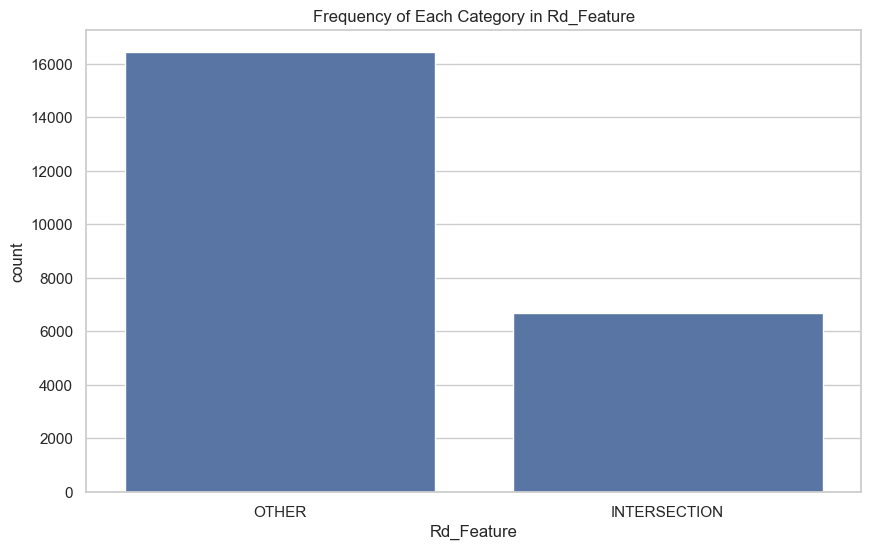

In [55]:
# Convert 'Rd_Feature' to a categorical type if not already
dat['Rd_Feature'] = dat['Rd_Feature'].astype('category')

# Print the original levels (categories)
print("Original levels in 'Rd_Feature':", dat['Rd_Feature'].cat.categories)


# Define the mapping for the category adjustments
# Assuming you know the original levels, replace them accordingly in the dictionary below
replacement_mapping_for_rd_feature = {
    "NONE": "OTHER",
    "DRIVEWAY": "OTHER",
    "INTERSECTION": "INTERSECTION",
    "RAMP": "OTHER",
    "OTHER": "OTHER",
    # Add or remove mappings based on your actual data
}

# Apply the replacement mapping
dat2['Rd_Feature'] = dat2['Rd_Feature'].replace(replacement_mapping_for_rd_feature).astype('category')

# Find the most common level (category) in the 'Rd_Feature'
most_common_level = dat2['Rd_Feature'].value_counts().idxmax()

# Reorder the levels so that the most common level comes first
dat2['Rd_Feature'] = dat2['Rd_Feature'].cat.reorder_categories([most_common_level] + [cat for cat in dat2['Rd_Feature'].cat.categories if cat != most_common_level], ordered=True)

# Display the frequency table for the 'Rd_Feature' column to verify the changes
draw_bar('Rd_Feature')

Change 3. Rd_Character to just STRAIGHT and CURVE

Rd_Character: Combine the three straight levels into STRAIGHT and the three curve levels into 
CURVE. With only 13 observations in OTHER, fold it into CURVE (because of the low 
means/medians).

/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/3351597617.py:14: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dat2['Rd_Character'] = dat2['Rd_Character'].replace(replacement_mapping_rd_character).astype('category')


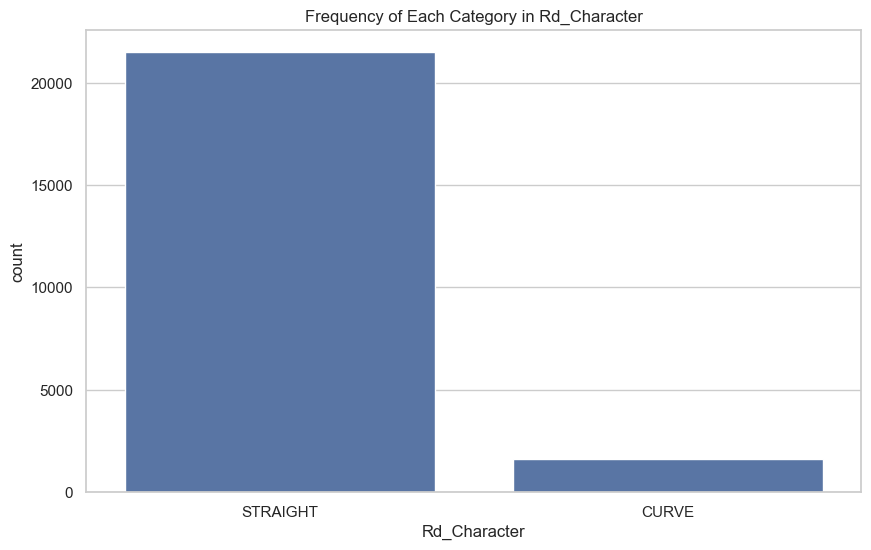

In [56]:
dat2['Rd_Character'] = dat2['Rd_Character'].astype('category')

# Replace specified levels with new designations
replacement_mapping_rd_character = {
    "STRAIGHT-LEVEL": "STRAIGHT",
    "CURVE-LEVEL": "CURVE",
    # Adjust the original levels and mappings as necessary
    "CURVE-GRADE": "CURVE",
    "CURVE-OTHER": "CURVE",
    "OTHER": "CURVE",
    "STRAIGHT-GRADE": "STRAIGHT",
    "STRAIGHT-OTHER": "STRAIGHT"
}
dat2['Rd_Character'] = dat2['Rd_Character'].replace(replacement_mapping_rd_character).astype('category')

# Relevel based on the frequency
most_common_level_rd_character = dat2['Rd_Character'].value_counts().idxmax()
dat2['Rd_Character'] = dat2['Rd_Character'].cat.reorder_categories([most_common_level_rd_character] + [cat for cat in dat2['Rd_Character'].cat.categories if cat != most_common_level_rd_character], ordered=True)

# Display the frequency table for 'Rd_Character'
draw_bar('Rd_Character')

Change 4. Rd_Surface combine the two ASPHALTs and the others.

Rd_Surface: Combine the two asphalt into ASPHALT and the three others into OTHER

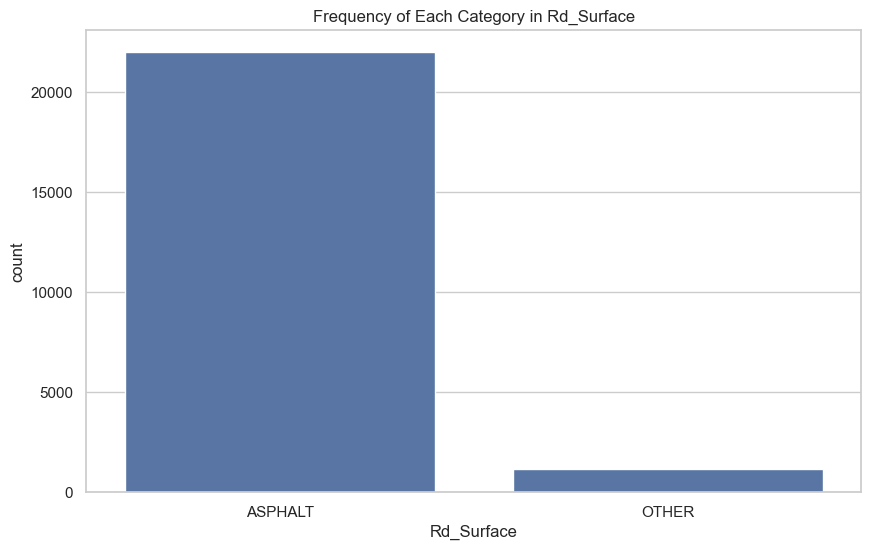

In [64]:
dat2['Rd_Surface'] = dat2['Rd_Surface'].astype('category')

# 定义一个映射来合并等级为 'ASPHALT' 和 'OTHER'
replacement_mapping_for_Rd_Surface = {
    "SMOOTH ASPHALT": "ASPHALT",
    "COARSE ASPHALT": "ASPHALT",
    "CONCRETE": "OTHER",
    "GROOVED CONCRETE": "OTHER",
    "OTHER": "OTHER"
}

# 应用映射
dat2['Rd_Surface'] = dat2['Rd_Surface'].replace(replacement_mapping_for_Rd_Surface)

# 重新转换为分类类型以确保数据类型，并为可能的重新排序做准备
dat2['Rd_Surface'] = dat2['Rd_Surface'].astype('category')

# 确定最常见的等级
most_common_surface = dat2['Rd_Surface'].value_counts().idxmax()

# 重新排序等级，将最常见的等级放在首位
dat2['Rd_Surface'] = dat2['Rd_Surface'].cat.reorder_categories(
    [most_common_surface] + [cat for cat in dat2['Rd_Surface'].cat.categories if cat != most_common_surface],
    ordered=True
)

# 显示修改后的等级及其频率
draw_bar('Rd_Surface')


Change 5. Traffic_Control combine SIGNAL and STOP-SIGN into one and the rest into OTHER.

 Traffic_Control: Combine SIGNAL and STOP‐SIGN into one level, SIGNAL‐STOP, and the others 
into OTHER.  

Original Levels: Index(['OTHER', 'SIGNAL-STOP'], dtype='object')


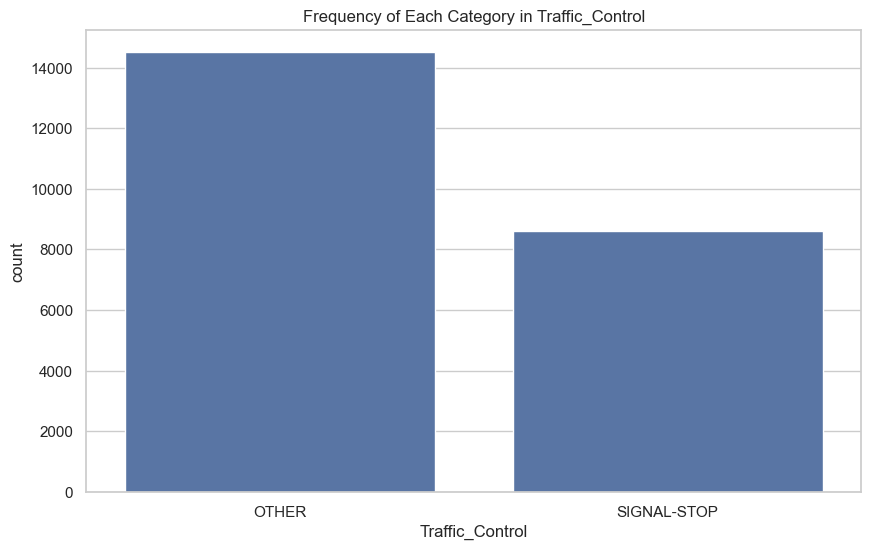

In [62]:
dat2['Traffic_Control'] = dat2['Traffic_Control'].astype('category')

# Print the original levels for 'Traffic_Control'
print("Original Levels:", dat2['Traffic_Control'].cat.categories)

# Define a mapping for consolidating levels into 'SIGNAL-STOP' and 'OTHER'
replacement_mapping_for_Traffic_Control = {
    "NONE": "OTHER",
    "YIELD": "OTHER",
    "SIGNAL": "SIGNAL-STOP",
    "STOP-SIGN": "SIGNAL-STOP",
    "OTHER": "OTHER"
    # Adjust the keys according to the actual original levels of 'Traffic_Control'
}

# Apply the mapping
dat2['Traffic_Control'] = dat2['Traffic_Control'].replace(replacement_mapping_for_Traffic_Control)

# Re-convert to categorical to enforce the data type and for possible reordering
dat2['Traffic_Control'] = dat2['Traffic_Control'].astype('category')

# Identify the most common level
most_common_traffic_control = dat2['Traffic_Control'].value_counts().idxmax()

# Reorder the levels, placing the most common level first
dat2['Traffic_Control'] = dat2['Traffic_Control'].cat.reorder_categories(
    [most_common_traffic_control] + [cat for cat in dat2['Traffic_Control'].cat.categories if cat != most_common_traffic_control], 
    ordered=True
)

# Display the modified levels and their frequencies
draw_bar('Traffic_Control')

Return to dat and check a data summary to ensure everything was done as intended.

The other predictor variables either show little difference between the factor levels or enough 
differences throughout so that no obvious groupings exist. 

#  Use observations from principal components analysis (PCA) to generate a new feature

In [63]:
from sklearn.preprocessing import OneHotEncoder

# 使用 sparse_output 替代 sparse
encoder = OneHotEncoder(sparse_output=False, drop=None)  # 保留所有特征，适用于 PCA

# 剩余的代码不变
dat_pca_bin = encoder.fit_transform(dat_pca)
dat_pca_bin_df = pd.DataFrame(dat_pca_bin, columns=encoder.get_feature_names_out())

# 显示前几行以验证结果
print(dat_pca_bin_df.head())


NameError: name 'dat_pca' is not defined

解释的方差比率（每个主成分）:
[2.23013225e-01 1.25856203e-01 1.09157007e-01 1.02163243e-01
 8.72931636e-02 7.10234161e-02 6.83250927e-02 6.71011271e-02
 5.61020938e-02 4.23796983e-02 2.78062065e-02 1.97795243e-02
 1.92052062e-29 8.58674806e-30 2.54412948e-30]

主成分的旋转（载荷）:
    Rd_Conditions_DRY  Rd_Conditions_ICE-SNOW-SLUSH  Rd_Conditions_OTHER  \
0           -0.511660                      0.090375             0.056102   
1            0.032795                      0.085065             0.183209   
2           -0.074985                      0.662448             0.103093   
3           -0.014841                     -0.173100             0.591024   
4            0.181236                     -0.032634            -0.081859   
5            0.000305                      0.003229            -0.013872   
6           -0.015249                      0.028817            -0.015820   
7           -0.007850                     -0.020239             0.004442   
8            0.003939                      0.011410      

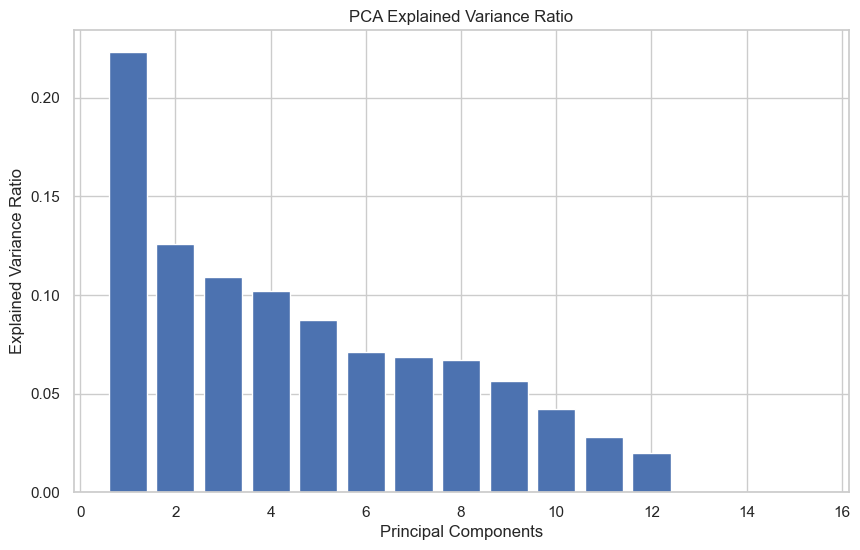

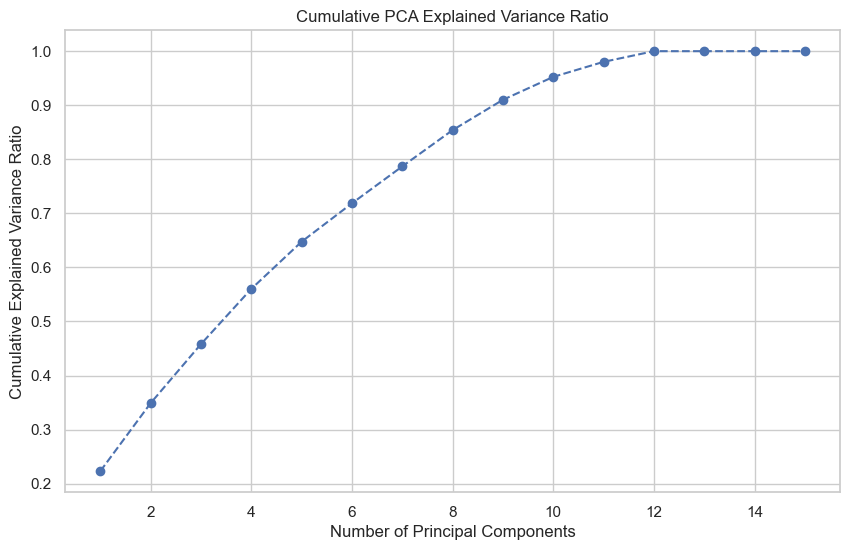

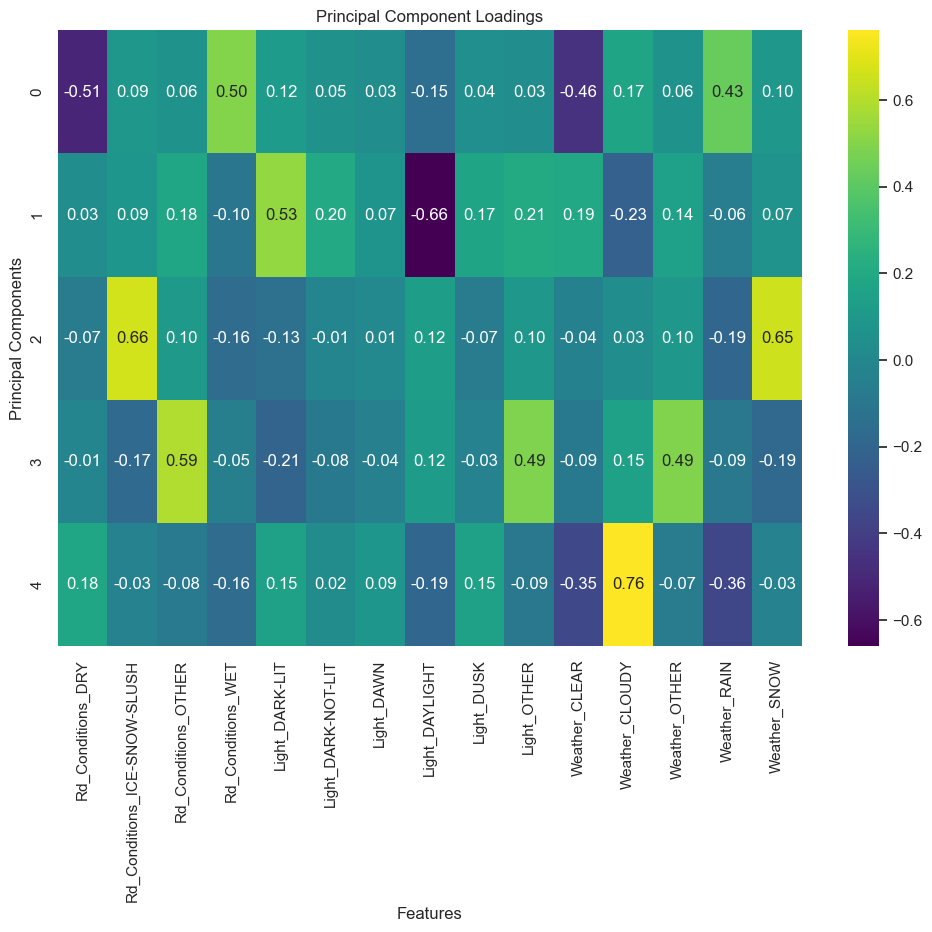

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 首先，对数据进行标准化
scaler = StandardScaler()
dat_pca_scaled = scaler.fit_transform(dat_pca_bin_df)

# 执行 PCA
pca_weather = PCA()
pca_weather.fit(dat_pca_scaled)

# 打印 PCA 分析的总结信息
print("解释的方差比率（每个主成分）:")
print(pca_weather.explained_variance_ratio_)

print("\n主成分的旋转（载荷）:")
# 载荷可以通过 components_ 属性获得。为了更好地理解，我们可以将其转换为 DataFrame
components_df = pd.DataFrame(pca_weather.components_, columns=dat_pca_bin_df.columns)
print(components_df)

# 如果你想查看特定数量的主成分，比如前几个，可以在 PCA() 中设置 n_components 参数
# 例如：pca_weather = PCA(n_components=5)

#解释的方差比率的条形图
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_weather.explained_variance_ratio_) + 1), pca_weather.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance Ratio')
plt.show()

#累积解释的方差比率
cumulative_variance_ratio = np.cumsum(pca_weather.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative PCA Explained Variance Ratio')
plt.show()

#主成分载荷（主成分与原始变量的相关性）
n_components_to_plot = 5  # 可以调整这个数值
components_to_plot = components_df.iloc[:n_components_to_plot, :]

plt.figure(figsize=(12, 8))
sns.heatmap(components_to_plot, cmap='viridis', annot=True, fmt=".2f")
plt.ylabel('Principal Components')
plt.xlabel('Features')
plt.title('Principal Component Loadings')
plt.xticks(rotation=90)  # 如果特征名称太长，可以旋转以便阅读
plt.show()

Running the PCA on these three variables shows that only 22% of variation is explained by the first 
principal component (PC) and 35% by the first two PCs. However, the loadings may highlight interesting 
relationships among these variables.

The largest loadings on the first PC are: 

Rd_ConditionsDRY: ‐0.51 

Rd_ConditionsWET: 0.50 

WeatherCLEAR: ‐0.46 

Weather RAIN: 0.43 

Applying these weights creates a variable that is strongly positive for rain/wet conditions and strongly 
negative for dry/clear conditions. It makes sense to pair up each of these as they would typically appear 
together, e.g. rain leads to wet roads. 

Based on these results, I created a new feature, WETorDRY, based on the Rd_Conditions and Weather 
variables, deleting these two while retaining the Light variable as is.

In [65]:
scaler = StandardScaler()
dat_pca_bin_std = scaler.fit_transform(dat_pca_bin_df)
dat_pca_bin_std_df = pd.DataFrame(dat_pca_bin_std, columns=dat_pca_bin_df.columns)

# 基于 PCA 结果创建新特征
# 这里使用的系数是基于你提供的 R 代码示例
dat2['WETorDRY'] = (-0.51 * dat_pca_bin_std_df['Rd_Conditions_DRY'] +
                    0.5 * dat_pca_bin_std_df['Rd_Conditions_WET'] -
                    0.46 * dat_pca_bin_std_df['Weather_CLEAR'] +
                    0.43 * dat_pca_bin_std_df['Weather_RAIN'])

print(dat2['WETorDRY'].describe())

NameError: name 'dat_pca_bin_df' is not defined

从 dat2 中删除用于创建新特征的原始变量

In [66]:
# 以 'Rd_Conditions' 和 'Weather' 开头的列可能已经在之前的步骤中用于创建新特征
# 删除这些列的示例
for col in dat2.columns:
    if col.startswith('Rd_Conditions_') or col.startswith('Weather_'):
        del dat2[col]

# 检查数据以确认删除
print(dat2.head())

   Crash_Score  year Month Time_of_Day Rd_Feature Rd_Character   Rd_Class  \
0         6.56  2016     6  LATE-EARLY      OTHER     STRAIGHT  STATE HWY   
1         6.53  2016     6     DAYTIME      OTHER     STRAIGHT      OTHER   
2         1.58  2016     6     DAYTIME      OTHER     STRAIGHT  STATE HWY   
3         7.15  2016     6     DAYTIME      OTHER     STRAIGHT      OTHER   
4         9.57  2016     6  LATE-EARLY      OTHER     STRAIGHT      OTHER   

           Rd_Configuration Rd_Surface Rd_Conditions         Light Weather  \
0  TWO-WAY-PROTECTED-MEDIAN    ASPHALT           DRY      DAYLIGHT   CLEAR   
1         TWO-WAY-NO-MEDIAN    ASPHALT           DRY      DAYLIGHT   CLEAR   
2         TWO-WAY-NO-MEDIAN    ASPHALT           DRY  DARK-NOT-LIT   CLEAR   
3         TWO-WAY-NO-MEDIAN    ASPHALT           DRY      DAYLIGHT   CLEAR   
4         TWO-WAY-NO-MEDIAN    ASPHALT           DRY      DARK-LIT   CLEAR   

  Traffic_Control Work_Area  
0           OTHER        NO  
1       

In [67]:
dat2

,Crash_Score,year,Month,Time_of_Day,Rd_Feature,Rd_Character,Rd_Class,Rd_Configuration,Rd_Surface,Rd_Conditions,Light,Weather,Traffic_Control,Work_Area
0,6.56,2016,6,LATE-EARLY,OTHER,STRAIGHT,STATE HWY,TWO-WAY-PROTECTED-MEDIAN,ASPHALT,DRY,DAYLIGHT,CLEAR,OTHER,NO
1,6.53,2016,6,DAYTIME,OTHER,STRAIGHT,OTHER,TWO-WAY-NO-MEDIAN,ASPHALT,DRY,DAYLIGHT,CLEAR,OTHER,NO
2,1.58,2016,6,DAYTIME,OTHER,STRAIGHT,STATE HWY,TWO-WAY-NO-MEDIAN,ASPHALT,DRY,DARK-NOT-LIT,CLEAR,OTHER,NO
3,7.15,2016,6,DAYTIME,OTHER,STRAIGHT,OTHER,TWO-WAY-NO-MEDIAN,ASPHALT,DRY,DAYLIGHT,CLEAR,OTHER,NO
4,9.57,2016,6,LATE-EARLY,OTHER,STRAIGHT,OTHER,TWO-WAY-NO-MEDIAN,ASPHALT,DRY,DARK-LIT,CLEAR,OTHER,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23132,1.80,2018,12,DAYTIME,OTHER,STRAIGHT,STATE HWY,TWO-WAY-UNPROTECTED-MEDIAN,ASPHALT,DRY,DARK-LIT,CLEAR,OTHER,NO
23133,2.59,2018,12,LATE-EARLY,INTERSECTION,STRAIGHT,STATE HWY,TWO-WAY-UNPROTECTED-MEDIAN,ASPHALT,DRY,DUSK,CLEAR,SIGNAL-STOP,NO
23134,6.95,2018,12,DAYTIME,INTERSECTION,STRAIGHT,OTHER,TWO-WAY-UNPROTECTED-MEDIAN,ASPHALT,DRY,DAYLIGHT,CLEAR,SIGNAL-STOP,NO
23135,3.17,2018,12,DAYTIME,OTHER,STRAIGHT,US HWY,TWO-WAY-PROTECTED-MEDIAN,ASPHALT,DRY,DARK-NOT-LIT,CLEAR,OTHER,NO


# Select an interaction


An interaction is indicated when changing the level of one variable alters how levels of the other 
variables affect the target. 

Select one pair of features that should be included as an interaction variable in a generalized 
linear model (GLM). Do this by first proposing two variables that are likely to interact and then 
using the supplied boxplot function to confirm the existence of an interaction. Continue until a 
promising interaction has been identified.


A first thought is Rd_Character and Rd_Class. Changing Rd_Character from STRAIGHT to CURVE may 
have a different effect depending on the Rd_Class. US highways may have gentler curves than state 
highways and hence a different effect. As the plot below shows, there is no interaction here. Whether 
STRAIGHT or CURVE the effect of Rd_Class is the same. 


/var/folders/1w/s56h1vn55nb7g1ccg7xc91l00000gn/T/ipykernel_58837/2643996993.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


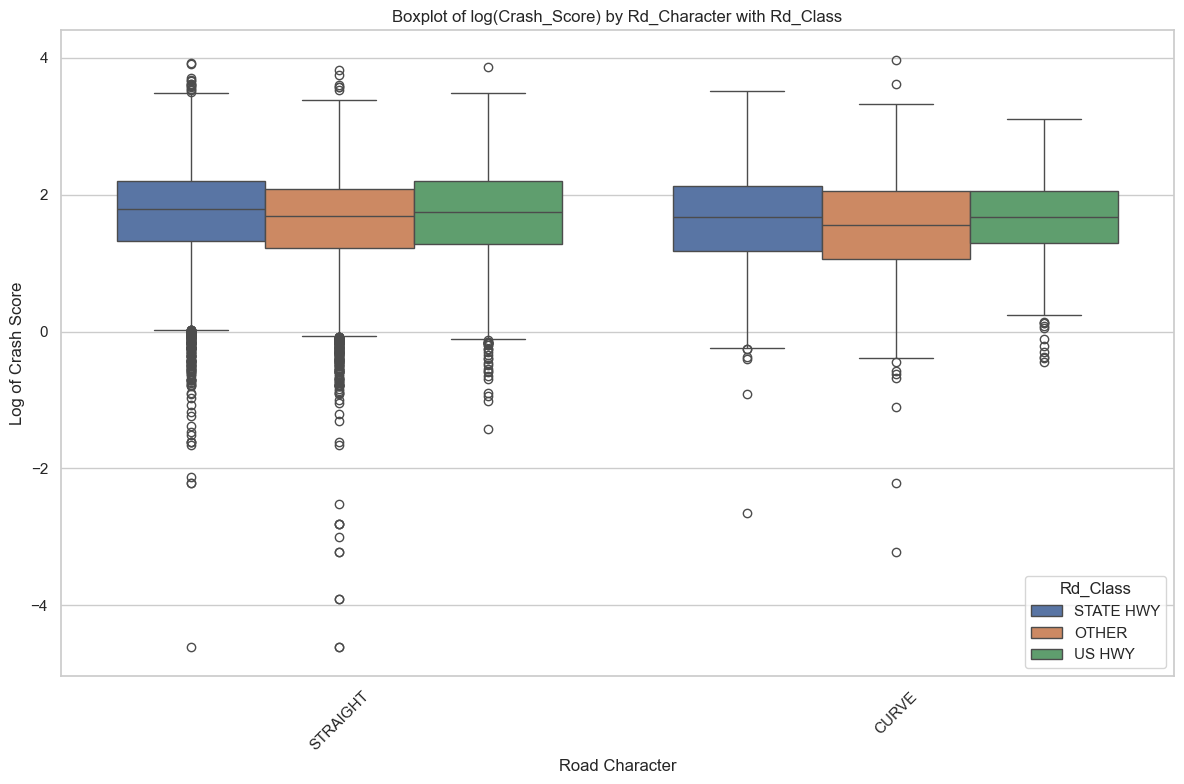

In [20]:


# 设置绘图风格
sns.set(style="whitegrid")

# 绘制箱形图
# 注意：我们需要先确保 Crash_Score 没有负数或零，因为对这些值取对数是无意义的
# 这里我们假设 dat2 中的 Crash_Score 都是正数
plt.figure(figsize=(12, 8))  # 设置图形大小
ax = sns.boxplot(x='Rd_Character', y=np.log(dat2['Crash_Score']), hue='Rd_Class', data=dat2)

# 设置图表标题和轴标签
plt.title('Boxplot of log(Crash_Score) by Rd_Character with Rd_Class')
plt.xlabel('Road Character')
plt.ylabel('Log of Crash Score')

# 由于 'Rd_Character' 的不同值可能很多，旋转 x 轴标签以改善可读性
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()

Another possibility is Traffic_Control and Rd_Feature. Perhaps signals and stop signs take away the 
relative impact of intersections. As seen below, when traffic is controlled, intersection and other then 
have very similar effects, while, when traffic is not controlled, intersections have higher Crash Score.

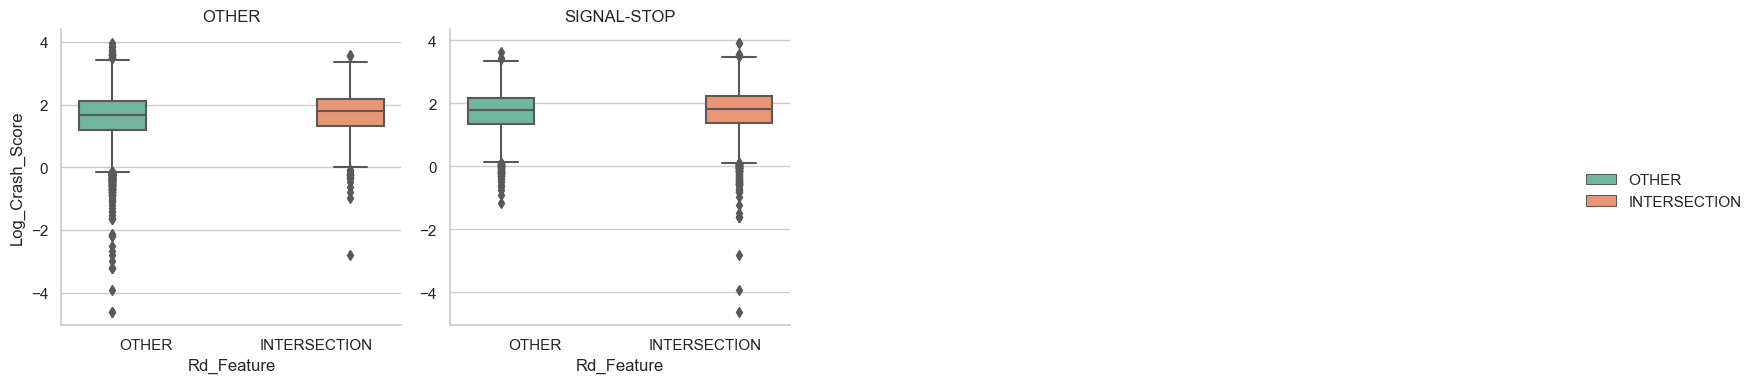

In [67]:
# 首先为 'Crash_Score' 创建一个对数变换的列
dat2['Log_Crash_Score'] = np.log(dat2['Crash_Score'])

# 使用 FacetGrid 创建一个分面网格，每个 'Traffic_Control' 一个分面
g = sns.FacetGrid(dat2, col="Traffic_Control", col_wrap=4, height=4, sharex=False, sharey=False)

# 使用 map_dataframe 方法绘制箱形图，这里传递列名作为参数
g.map_dataframe(sns.boxplot, x='Rd_Feature', y='Log_Crash_Score', hue='Rd_Feature', palette='Set2')

# 设置每个分面的标题
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# 添加图例
g.add_legend()

plt.show()

I’ll use this one for future work. It will be good to understand what is going on at intersections without 
signals or stop signs.

In [80]:
import pandas as pd


# Get all column names that start with 'year[T'
year_columns = [col for col in dat2.columns if col.startswith('year[T')]

# Drop all these columns from dat2
dat2 = dat2.drop(year_columns, axis=1)

# Show the updated DataFrame (optional)
print(dat2)




       Crash_Score Month Time_of_Day    Rd_Feature Rd_Character   Rd_Class  \
0             6.56     6  LATE-EARLY         OTHER     STRAIGHT  STATE HWY   
1             6.53     6     DAYTIME         OTHER     STRAIGHT      OTHER   
2             1.58     6     DAYTIME         OTHER     STRAIGHT  STATE HWY   
3             7.15     6     DAYTIME         OTHER     STRAIGHT      OTHER   
4             9.57     6  LATE-EARLY         OTHER     STRAIGHT      OTHER   
...            ...   ...         ...           ...          ...        ...   
23132         1.80    12     DAYTIME         OTHER     STRAIGHT  STATE HWY   
23133         2.59    12  LATE-EARLY  INTERSECTION     STRAIGHT  STATE HWY   
23134         6.95    12     DAYTIME  INTERSECTION     STRAIGHT      OTHER   
23135         3.17    12     DAYTIME         OTHER     STRAIGHT     US HWY   
23136         5.27    12  LATE-EARLY  INTERSECTION     STRAIGHT  STATE HWY   

                 Rd_Configuration Rd_Surface Rd_Conditions     

In [81]:
import pandas as pd

# Assuming 'dat' is your DataFrame and 'Month' is the column you want to convert
dat2['Month'] = dat2['Month'].astype('category')

# To get the levels (categories) of the 'Month' column
levels = dat['Month'].cat.categories
print(levels)

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')


In [83]:
from sklearn.model_selection import train_test_split
import numpy as np

# Set the random seed for reproducibility
np.random.seed(1234)

# Split the data into training and test sets
train, test = train_test_split(dat2, test_size=0.25, random_state=1234)

# Print the mean of 'Crash_Score' in the training set
print("TRAIN")
print(train['Crash_Score'].mean())

# Print the mean of 'Crash_Score' in the test set
print("TEST")
print(test['Crash_Score'].mean())

TRAIN
6.568661249423697
TEST
6.561500432152117


In [84]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import numpy as np

# Get all column names except 'Crash_Score'
variables = [col for col in train.columns if col != 'Crash_Score']

# Create the formula string
formula = 'Crash_Score ~ ' + ' + '.join(variables) + ' + Traffic_Control:Rd_Feature'

# Fit the GLM model
model = smf.glm(formula=formula, data=train, family=sm.families.Gamma(link=sm.families.links.log()))
GLMgamma = model.fit()


# Print the summary
print(GLMgamma.summary())

# Print the AIC
print("AIC")
print(GLMgamma.aic)

# Predict on the test set
predictions = GLMgamma.predict(test)

# Print the RMSE
print("RMSE")
print(np.sqrt(mean_squared_error(test['Crash_Score'], predictions)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:            Crash_Score   No. Observations:                17352
Model:                            GLM   Df Residuals:                    17314
Model Family:                   Gamma   Df Model:                           37
Link Function:                    log   Scale:                         0.41633
Method:                          IRLS   Log-Likelihood:                -46588.
Date:                Tue, 05 Mar 2024   Deviance:                       7191.2
Time:                        20:37:12   Pearson chi2:                 7.21e+03
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01550
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import numpy as np

# Get all column names except 'Crash_Score'
variables = [col for col in train.columns if col != 'Crash_Score']

# Create the formula string
formula = 'Crash_Score ~ ' + ' + '.join(variables) + ' + Work_Area:Rd_Feature'

# Fit the GLM model
model = smf.glm(formula=formula, data=train, family=sm.families.InverseGaussian(link=sm.families.links.log()))
GLMig = model.fit()

# Print the summary
print(GLMig.summary())

# Print the AIC
print("AIC")
print(GLMig.aic)

# Predict on the test set
predictions = GLMig.predict(test)

# Print the RMSE
print("RMSE")
print(np.sqrt(mean_squared_error(test['Crash_Score'], predictions)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:            Crash_Score   No. Observations:                17352
Model:                            GLM   Df Residuals:                    17314
Model Family:         InverseGaussian   Df Model:                           37
Link Function:                    log   Scale:                        0.063930
Method:                          IRLS   Log-Likelihood:                -52210.
Date:                Tue, 05 Mar 2024   Deviance:                       2123.6
Time:                        20:42:44   Pearson chi2:                 1.11e+03
No. Iterations:                    16   Pseudo R-squ. (CS):            0.01567
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import numpy as np

# Get all column names except 'Crash_Score'
variables = [col for col in train.columns if col != 'Crash_Score']

# Create the formula string
formula = 'Crash_Score ~ ' + ' + '.join(variables) + ' + Traffic_Control:Rd_Feature'

# Fit the GLM model
model = smf.glm(formula=formula, data=train, family=sm.families.Gaussian(link=sm.families.links.log()))
GLMnorm = model.fit()

# Print the summary
print(GLMnorm.summary())

# Print the AIC
print("AIC")
print(GLMnorm.aic)

# Predict on the test set
predictions = GLMnorm.predict(test)

# Print the RMSE
print("RMSE")
print(np.sqrt(mean_squared_error(test['Crash_Score'], predictions)))

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Crash_Score   No. Observations:                17352
Model:                            GLM   Df Residuals:                    17314
Model Family:                Gaussian   Df Model:                           37
Link Function:                    log   Scale:                          17.993
Method:                          IRLS   Log-Likelihood:                -49676.
Date:                Tue, 05 Mar 2024   Deviance:                   3.1153e+05
Time:                        20:42:40   Pearson chi2:                 3.12e+05
No. Iterations:                     8   Pseudo R-squ. (CS):            0.01526
Covariance Type:            nonrobust                                         
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


In [99]:
# Get all column names except 'Crash_Score'
variables = [col for col in train.columns if col != 'Crash_Score']

# Start with the intercept only model
model = smf.glm(formula='Crash_Score ~ 1', data=train, family=sm.families.Gamma(link=sm.families.links.Log()))
model_fit = model.fit()

# Save the BIC of the initial model
bic = model_fit.bic_llf

# Initialize selected variables
selected_variables = []

# Forward selection process
for variable in variables:
    # Add the current variable to the list of selected variables
    selected_variables.append(variable)
    
    # Create the formula string
    formula = 'Crash_Score ~ ' + ' + '.join(selected_variables)
    
    # Fit the GLM model
    model = smf.glm(formula=formula, data=train, family=sm.families.Gamma(link=sm.families.links.Log()))
    model_fit = model.fit()
    
    # If the BIC has decreased, update the BIC. Otherwise, remove the variable from the list
    if model_fit.bic_llf < bic:
        bic = model_fit.bic_llf
    else:
        selected_variables.remove(variable)

# Print the selected variables
print('Selected variables:', selected_variables)


Selected variables: ['Time_of_Day', 'Rd_Feature', 'Rd_Class', 'Traffic_Control']


In [100]:
import statsmodels.formula.api as smf
import numpy as np

# Fit the GLM model
GLMgammaR = smf.glm(formula='Crash_Score ~ Rd_Class + Rd_Feature + Time_of_Day + Traffic_Control', 
                     data=train, 
                     family=sm.families.Gamma(link=sm.families.links.Log())).fit()

# Print the summary
print(GLMgammaR.summary())

# Print the AIC
print("AIC")
print(GLMgammaR.aic)

# Predict on the test data
predict = GLMgammaR.predict(test)

# Print the RMSE
print("RMSE")
print(np.sqrt(np.sum((test['Crash_Score'] - predict) ** 2) / len(test)))

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Crash_Score   No. Observations:                17352
Model:                            GLM   Df Residuals:                    17345
Model Family:                   Gamma   Df Model:                            6
Link Function:                    Log   Scale:                         0.41702
Method:                          IRLS   Log-Likelihood:                -46614.
Date:                Wed, 06 Mar 2024   Deviance:                       7212.3
Time:                        00:12:26   Pearson chi2:                 7.23e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01260
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [102]:
import statsmodels.formula.api as smf

# Fit the GLM model
GLMgammaRdat = smf.glm(formula='Crash_Score ~ Rd_Class + Rd_Feature + Time_of_Day + Traffic_Control', 
                       data=dat, 
                       family=sm.families.Gamma(link=sm.families.links.Log())).fit()

# Print the summary
print(GLMgammaRdat.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Crash_Score   No. Observations:                23137
Model:                            GLM   Df Residuals:                    23121
Model Family:                   Gamma   Df Model:                           15
Link Function:                    Log   Scale:                         0.41861
Method:                          IRLS   Log-Likelihood:                -62138.
Date:                Wed, 06 Mar 2024   Deviance:                       9605.7
Time:                        00:17:16   Pearson chi2:                 9.68e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01383
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       